In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the Data

Again I am using my google drive in order to avoid uploading the files.

In [242]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#I used my google drive and saved the file into a location, in order to avoid uploading them every time I need them
Location = '/content/drive/MyDrive/Machine_Learning/prostate.data'

#read the file and pass it into a dataframe, without headers
data_df = pd.read_csv(Location,sep="\t",index_col=0);
# data_df=data_df.iloc[: , 1:]
#set my Features headers 
# data_df.columns = [x.strip() for x in data_df.columns]
print(data_df.shape)
print(data_df.columns.values)
print(data_df)



(97, 10)
['lcavol' 'lweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45' 'lpsa'
 'train']
      lcavol   lweight  age      lbph  ...  gleason  pgg45      lpsa  train
1  -0.579818  2.769459   50 -1.386294  ...        6      0 -0.430783      T
2  -0.994252  3.319626   58 -1.386294  ...        6      0 -0.162519      T
3  -0.510826  2.691243   74 -1.386294  ...        7     20 -0.162519      T
4  -1.203973  3.282789   58 -1.386294  ...        6      0 -0.162519      T
5   0.751416  3.432373   62 -1.386294  ...        6      0  0.371564      T
..       ...       ...  ...       ...  ...      ...    ...       ...    ...
93  2.830268  3.876396   68 -1.386294  ...        7     60  4.385147      T
94  3.821004  3.896909   44 -1.386294  ...        7     40  4.684443      T
95  2.907447  3.396185   52 -1.386294  ...        7     10  5.143124      F
96  2.882564  3.773910   68  1.558145  ...        7     80  5.477509      T
97  3.471966  3.974998   68  0.438255  ...        7     20  5.582932      F

Split the train and the test set. I used standard scaler but it is in comments. The results wasn't desirable.

In [243]:
train_df=data_df[data_df['train']=="T"].iloc[: , :-1]
test_df=data_df[data_df['train']=="F"].iloc[: , :-1]
#Standardize my data to have mean=0 and var=1
# scaler = StandardScaler()
# train_df[:] = scaler.fit_transform(train_df[:])
# test_df[:] = scaler.fit_transform(test_df[:])
train_df.head(10)
test_df.shape[0]
print(test_df)
print(train_df)

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
7   0.737164  3.473518   64  0.615186    0 -1.386294        6      0  0.765468
9  -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0  1.047319
10  0.223144  3.244544   63 -1.386294    0 -1.386294        6      0  1.047319
15  1.205971  3.442019   57 -1.386294    0 -0.430783        7      5  1.398717
22  2.059239  3.501043   60  1.474763    0  1.348073        7     20  1.658228
25  0.385262  3.667400   69  1.599388    0 -1.386294        6      0  1.731656
26  1.446919  3.124565   68  0.300105    0 -1.386294        6      0  1.766442
28 -0.400478  3.865979   67  1.816452    0 -1.386294        7     20  1.816452
32  0.182322  3.804438   65  1.704748    0 -1.386294        6      0  2.008214
34  0.009950  3.267666   54 -1.386294    0 -1.386294        6      0  2.021548
36  1.308333  4.119850   64  2.171337    0 -1.386294        7      5  2.085672
42  1.442202  3.682610   68 -1.386294    0 -1.386294

# Score_function
A function that calculates the scores of a prediction

In [244]:
from sklearn.metrics import mean_squared_error,r2_score
#a custome function to evaluate my results (RSE_TRAIN,,RSE_TEST,R2_TRAIN,R2_TEST)
def scores_(train_df,test_df,my_predictions_test,my_predictions_train):
  rse_train=np.sqrt(mean_squared_error(train_df.values[:,-1],my_predictions_train) ) 
  # print("RSE_TRAIN: ",rse_train)

  rse_test=np.sqrt(mean_squared_error(test_df.values[:,-1],my_predictions_test) ) 
  # print("RSE_TEST",rse_test)

  r2_train=r2_score(train_df.values[:,-1],my_predictions_train)
  # print("R2_TRAIN",r2_train)

  r2_test=r2_score(test_df.values[:,-1],my_predictions_test)
  # print("R2_TEST",r2_test)
  return rse_train,rse_test,r2_train,r2_test

#Linear Regression

The same logic I followed in the first exercise.

In [245]:
#Linear Regression
from sklearn.model_selection import  train_test_split
#fit the model/ calculate the coefficients
def my_coeffs_LR(X,y):
  b=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
  coeffs=b[:-1]
  bias=b[-1]
  return coeffs,bias
#make my predictions
def predict_LR(x,coeffs,b):
  return np.dot(x,coeffs)+b  

#add the last column of 1 for the bias values
train_values=np.concatenate([train_df.values[:,:-1],np.ones([train_df.shape[0],1])],axis=1)

#take the bias and the coeffs
coeffs_LR,bias_LR=my_coeffs_LR(train_values,train_df['lpsa'].values)

print(coeffs_1)
print(bias_1)
#make predictions to both train and test sets
my_predictions_train_LR=predict_LR(train_df.values[:,:-1],coeffs_LR,bias_LR) 
my_predictions_test_LR=predict_LR(test_df.values[:,:-1],coeffs_LR,bias_LR) 

#take the scores of my predictions
my_scores_LR=scores_(train_df,test_df,my_predictions_test_LR,my_predictions_train_LR)
print(my_scores_LR)

[ 0.576747    0.59932053 -0.01867438  0.14538204  0.69836742 -0.19718781
 -0.0329361   0.0094979 ]
0.4939205964603519
(0.662721486039448, 0.7219930785731833, 0.6943711796768238, 0.5033798502381974)


#Ridge Regression
Here again we calculate the coefficients and then predict. The prediction function is exactly the same as the LR one. I am having a loop to scan all the different λ [0.002,2]. To run the RR with λ=10000 uncomment the line:

all_λ=[10000]

Results for λ=10000:

**lcavol	lweight	age	lbph	svi	lcp	gleason	pgg45**

0.00532	0.001683	0.005339	0.003041	0.001238	0.002592	0.000265	0.015206

As we can see the coefficients have become a lot smaller. This is happening because,as λ → ∞, the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach zero.

In [246]:
#Ridge Regression
#calculate the coefficients
def my_coeffs(X,y,λ):
  i_size=X.shape[1]
  I=np.identity(i_size)
  #here we have to set the last 1 on our identity matrix to 0
  #because the b0 is not included in the penalty term
  I[i_size-1,i_size-1]=0
  #Using the equation that have calculated on the report
  b=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+λ*I),X.T),y)
  coeffs=b[:-1]
  #the last column is the bias
  bias=b[-1]
  return coeffs,bias
#predict the same way as the linear regression
def predict(x,coeffs,b):
  return np.dot(x,coeffs)+b  

#add the last column of ones for the bias estimation
train_values=np.concatenate([train_df.values[:,:-1],np.ones([train_df.shape[0],1])],axis=1)

#a list to keep all the scores
final_scores=[]
#a list to keep all the coeffs
all_coeffs=[]
#a list to keep all the bias
all_bias=[]
#a list to keep all the λ
all_λ=np.arange(0.002, 2.0, 0.004).tolist()
# all_λ=[10000]
for λ in all_λ:
  #calculate coefficients and bias
  coeffs_1,bias_1=my_coeffs(train_values,train_df['lpsa'].values,λ)
  #keep them
  all_bias.append(bias_1)
  all_coeffs.append(coeffs_1)
  #make predictions for both train and test set
  my_predictions_train=predict(train_df.values[:,:-1],coeffs_1,bias_1) 
  my_predictions_test=predict(test_df.values[:,:-1],coeffs_1,bias_1) 
  #keep the final scores
  final_scores.append(scores_(train_df,test_df,my_predictions_test,my_predictions_train))


scores_array = np.array(final_scores)
df_scores=pd.DataFrame(scores_array.tolist())
df_scores.columns = ["rse_train", "rse_test", "r2_train", "r2_test"]
#print the λ that has the minimum RSE TEST ERROR
opt_λ=all_λ[df_scores['rse_test'].idxmin()]
print("The λ with the minimum RSE is:",opt_λ) 

coeffs_array = np.array(all_coeffs)
df_coeffs=pd.DataFrame(coeffs_array.tolist())
df_coeffs.columns = train_df.columns.values[:-1]


df_coeffs.head(10)

The λ with the minimum RSE is: 0.354


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,0.576546,0.613935,-0.018999,0.144851,0.736976,-0.206271,-0.029524,0.009465
1,0.576551,0.613765,-0.018995,0.144857,0.736510,-0.206163,-0.029567,0.009466
2,0.576555,0.613596,-0.018992,0.144862,0.736045,-0.206056,-0.029609,0.009466
3,0.576560,0.613426,-0.018988,0.144868,0.735581,-0.205949,-0.029651,0.009467
4,0.576565,0.613257,-0.018984,0.144874,0.735117,-0.205842,-0.029693,0.009467
5,0.576569,0.613087,-0.018980,0.144879,0.734654,-0.205735,-0.029736,0.009468
6,0.576574,0.612918,-0.018977,0.144885,0.734192,-0.205628,-0.029778,0.009468
7,0.576579,0.612749,-0.018973,0.144891,0.733730,-0.205521,-0.029820,0.009468
8,0.576583,0.612580,-0.018969,0.144897,0.733269,-0.205414,-0.029861,0.009469
9,0.576587,0.612411,-0.018965,0.144902,0.732809,-0.205308,-0.029903,0.009469


# Coeffs to λ sheet
As we can see again from the plots the coefficients have a tendency to shrink. Expect Bias which is independent to the shrinkage penalty(we have omit the b0 from the penalty).

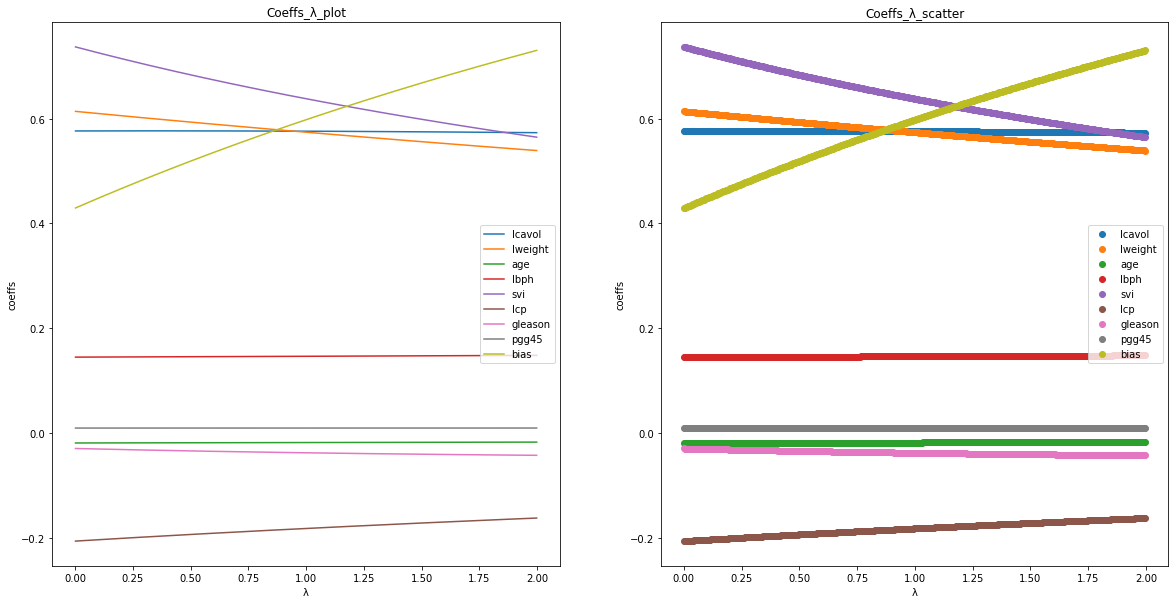

<Figure size 432x288 with 0 Axes>

In [247]:
import matplotlib.pyplot as plt

#concatenate coeefs and bias to a new df
coeffs_bias=df_coeffs.copy()
coeffs_bias['bias']=all_bias

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

for i in coeffs_bias.columns.values:
  scatter = ax1.plot(all_λ, coeffs_bias[i])

ax1.legend(coeffs_bias.columns)
ax1.set_xlabel('λ')
ax1.set_ylabel('coeffs')
ax1.set_title("Coeffs_λ_plot")
#I used scatter also (its the same plot )
for i in coeffs_bias.columns.values:
  scatter = ax2.scatter(all_λ, coeffs_bias[i])

ax2.legend(coeffs_bias.columns)
ax2.set_xlabel('λ')
ax2.set_ylabel('coeffs')
ax2.set_title("Coeffs_λ_scatter")
plt.show()  
plt.savefig('Coeffs_λ.eps', dpi = 300)

#Root Mean Squared Error to λ

As we can see the diagram has a magic spot where the λ produce the best predictions. This λ is exactly 0.354

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


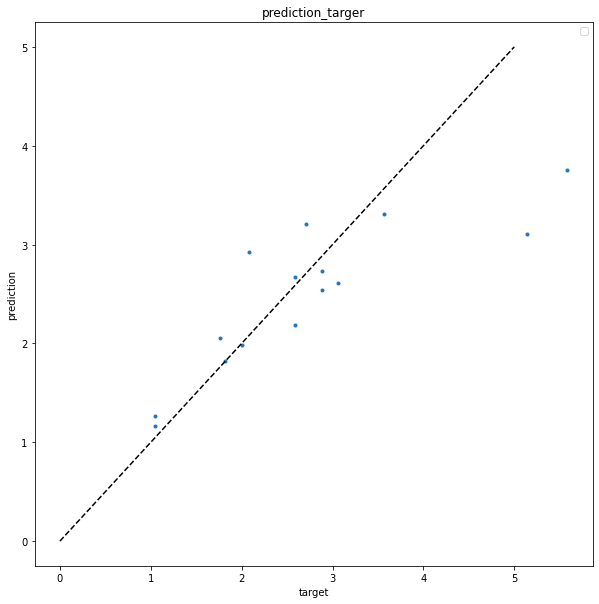

In [248]:
import matplotlib.pyplot as plt




#calculate coefficients and bias
coeffs_1,bias_1=my_coeffs(train_values,train_df['lpsa'].values,opt_λ)
#make predictions for both train and test set
my_predictions_train=predict(train_df.values[:,:-1],coeffs_1,bias_1) 
my_predictions_test=predict(test_df.values[:,:-1],coeffs_1,bias_1) 
my_scores=scores_(train_df,test_df,my_predictions,my_predictions_train)

#print a plot that shows the RSE for the test set based on the λ value
fig, (l) = plt.subplots(figsize=(10,10))
target_predictions = pd.DataFrame()
target_predictions['target']=test_df.values[:,-1]
target_predictions['predictions']=my_predictions
sample_df=target_predictions.sample(n=15)
l.legend(df_coeffs.columns)
l.set_xlabel('target')
l.set_ylabel('prediction')
l.set_title("prediction_targer")
l.plot( sample_df['target'],sample_df['predictions'],'.')
x = np.linspace(0, 5, 1000)
l.plot(x, x, 'k-',linestyle='--')
plt.savefig('prediction_targer.eps', dpi = 300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


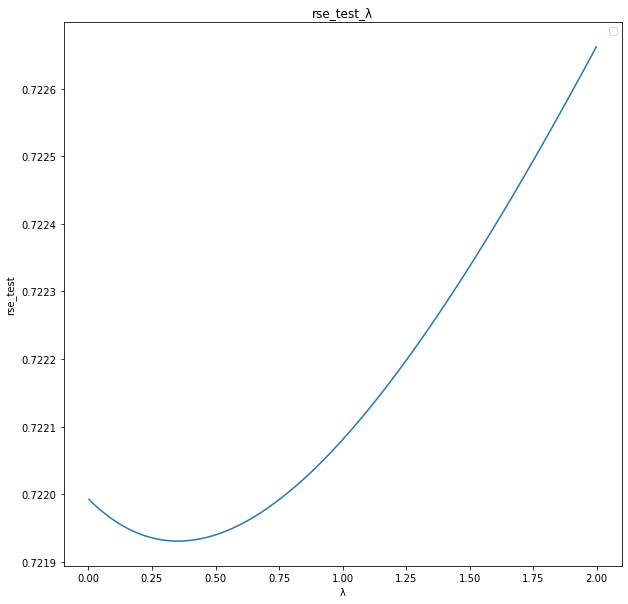

In [249]:
import matplotlib.pyplot as plt

#print a plot that shows the RSE for the test set based on the λ value
fig, (l) = plt.subplots(figsize=(10,10))
l.legend(df_coeffs.columns)
l.set_xlabel('λ')
l.set_ylabel('rse_test')
l.set_title("rse_test_λ")
l.plot( all_λ,df_scores['rse_test'])
plt.savefig('rse_λ.eps', dpi = 300)

In [250]:
#Linear vs Ridge Regression
print("Ridge Regression predictions: ",my_predictions_train)
print("Linear Regression predictions: ",my_predictions_train_LR)
print("############################################################")
print("Ridge Regression predictions: ",my_predictions_test)
print("Linear Regression predictions: ",my_predictions_test_LR)
print("############################################################")
print("Ridge Regression scores: ",my_scores)
print("Linear Regression scores: ",my_scores_LR)
print("############################################################")
print("Ridge Regression coefficients: ",coeffs_1)
print("Linear Regression coefficients: ",coeffs_LR)
print("############################################################")
print("Ridge Regression bias: ",bias_1)
print("Linear Regression bias: ",bias_LR)
print("############################################################")






Ridge Regression predictions:  [0.75978791 0.70109577 0.46153955 0.55806291 1.70077882 0.7640228
 2.23105393 1.46118512 0.95721229 2.03036609 1.78027534 1.85902289
 1.40743338 2.29599786 1.23665123 1.90131322 1.97738996 1.06085144
 2.58424821 2.19533226 2.27005739 1.97459236 2.1410949  1.98388478
 0.99787362 1.61095986 0.9696422  3.84566029 1.698991   2.14966039
 2.12534446 2.46057148 2.62255272 4.08757024 2.56343455 3.17140248
 3.05110531 2.38522234 2.30007427 2.88592319 2.52008212 2.95987116
 3.14813083 3.12989568 1.46432752 3.01553308 3.17754735 2.26197461
 3.32170917 3.44977725 3.51551656 3.5868054  3.3012233  2.13486292
 2.90509981 3.45934085 2.63895031 3.68990097 3.12876186 2.84599002
 4.07728694 3.346644   3.42897102 4.09929728 3.75512691 4.4299751
 4.29527989]
Linear Regression predictions:  [0.75353858 0.70040498 0.44906559 0.55687338 1.700083   0.76462172
 2.23169054 1.46213549 0.95764547 2.01839575 1.77468627 1.85140133
 1.39943465 2.28081126 1.24066142 1.90227158 1.97740214

# RR validation
I am comparing the results of the sklearn RR to mine, in order to ensure that the process is correct.

In [251]:
from sklearn.linear_model import Ridge
# using the Ridge regression to compare the results with my predictions
#test my Ridge regression for λ=0.002
print("Results for λ=0.002")
clf = Ridge(alpha=0.002)
clf.fit(train_df.values[:,:-1], train_df['lpsa'].values)
print("Sklearn_RR coefficients",clf.coef_)
print("my_RR coefficients",all_coeffs[0])
predictions1=clf.predict(train_df.values[:,:-1])
predictions2=clf.predict(test_df.values[:,:-1])

#print the scores of my ridge regression predictions and from sklearn ridge regression
scores1=scores_(train_df,test_df,predictions2,predictions1)
print("My_RR scores:",scores1)
#THE SCORES ARE THE SAME!!!!
print("Sklearn_RR scores:",df_scores.iloc[0].tolist())


Results for λ=0.002
Sklearn_RR coefficients [ 0.57654565  0.61393512 -0.01899913  0.14485092  0.7369756  -0.20627051
 -0.02952415  0.00946538]
my_RR coefficients [ 0.57654565  0.61393512 -0.01899913  0.14485092  0.7369756  -0.20627051
 -0.02952415  0.00946538]
My_RR scores: (0.6627214912760568, 0.7219923252674255, 0.6943711748468655, 0.503380886554567)
Sklearn_RR scores: [0.6627214912760568, 0.7219923252674095, 0.6943711748468655, 0.5033808865545892]
